# Lending Club Default Analysis

## Background
Lending club is the largest peer-to-peer marketplace connecting borrowers with lenders. Borrowers apply through an online platform where they are assigned an internal score. Lenders decide 1) Whether to lend and 2) The terms of loan such as interest rate, monthly instalment, tenure etc.

## Background Objective

### The aim is to identify patterns which indicate if a person is likely to default, which may be used for taking actions such as denying the loan, reducing the amount of loan, lending (to risky applicants) at a higher interest rate, etc.

In [1]:
import numpy as np,pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('loan.csv')
df

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39712,92187,92174,2500,2500,1075.0,36 months,8.07%,78.42,A,A4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39713,90665,90607,8500,8500,875.0,36 months,10.28%,275.38,C,C1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39714,90395,90390,5000,5000,1325.0,36 months,8.07%,156.84,A,A4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39715,90376,89243,5000,5000,650.0,36 months,7.43%,155.38,A,A2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
df.shape

(39717, 111)

In [4]:
df.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       ...
       'num_tl_90g_dpd_24m', 'num_tl_op_past_12m', 'pct_tl_nvr_dlq',
       'percent_bc_gt_75', 'pub_rec_bankruptcies', 'tax_liens',
       'tot_hi_cred_lim', 'total_bal_ex_mort', 'total_bc_limit',
       'total_il_high_credit_limit'],
      dtype='object', length=111)

In [5]:
pd.set_option('display.max_columns',None)
#pd.set_option('display.max_rows',None)

In [6]:
df.head(4)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0,Jan-85,1,NaN,NaN,3,0,13648,83.70%,9,f,0.0,0.0,5863.155187,5833.84,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,NaN,May-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0,Apr-99,5,NaN,NaN,3,0,1687,9.40%,4,f,0.0,0.0,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,NaN,Sep-13,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,small_business,real estate business,606xx,IL,8.72,0,Nov-01,2,NaN,NaN,2,0,2956,98.50%,10,f,0.0,0.0,3005.666844,3005.67,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,NaN,May-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.00,0,Feb-96,1,35.0,NaN,10,0,5598,21%,37,f,0.0,0.0,12231.890000,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,NaN,Apr-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN

In [7]:
# Checking for null values
df.isnull().sum()

id                                0
member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
                              ...  
tax_liens                        39
tot_hi_cred_lim               39717
total_bal_ex_mort             39717
total_bc_limit                39717
total_il_high_credit_limit    39717
Length: 111, dtype: int64

In [8]:
# percentage of missing values in each column
round(df.isnull().sum()/len(df.index), 2)*100

id                              0.0
member_id                       0.0
loan_amnt                       0.0
funded_amnt                     0.0
funded_amnt_inv                 0.0
                              ...  
tax_liens                       0.0
tot_hi_cred_lim               100.0
total_bal_ex_mort             100.0
total_bc_limit                100.0
total_il_high_credit_limit    100.0
Length: 111, dtype: float64

In [9]:
# removing the columns having more than 100% missing values
missing_columns = df.columns[100*(df.isnull().sum()/len(df.index))==100]
print(missing_columns)

Index(['mths_since_last_major_derog', 'annual_inc_joint', 'dti_joint',
       'verification_status_joint', 'tot_coll_amt', 'tot_cur_bal',
       'open_acc_6m', 'open_il_6m', 'open_il_12m', 'open_il_24m',
       'mths_since_rcnt_il', 'total_bal_il', 'il_util', 'open_rv_12m',
       'open_rv_24m', 'max_bal_bc', 'all_util', 'total_rev_hi_lim', 'inq_fi',
       'total_cu_tl', 'inq_last_12m', 'acc_open_past_24mths', 'avg_cur_bal',
       'bc_open_to_buy', 'bc_util', 'mo_sin_old_il_acct',
       'mo_sin_old_rev_tl_op', 'mo_sin_rcnt_rev_tl_op', 'mo_sin_rcnt_tl',
       'mort_acc', 'mths_since_recent_bc', 'mths_since_recent_bc_dlq',
       'mths_since_recent_inq', 'mths_since_recent_revol_delinq',
       'num_accts_ever_120_pd', 'num_actv_bc_tl', 'num_actv_rev_tl',
       'num_bc_sats', 'num_bc_tl', 'num_il_tl', 'num_op_rev_tl',
       'num_rev_accts', 'num_rev_tl_bal_gt_0', 'num_sats', 'num_tl_120dpd_2m',
       'num_tl_30dpd', 'num_tl_90g_dpd_24m', 'num_tl_op_past_12m',
       'pct_tl_nvr_dl

In [10]:
df=df.drop(missing_columns,axis=1)
df.shape

(39717, 57)

In [11]:
# Checking for null value percentage
100*(df.isnull().sum()/len(df.index))

id                             0.000000
member_id                      0.000000
loan_amnt                      0.000000
funded_amnt                    0.000000
funded_amnt_inv                0.000000
term                           0.000000
int_rate                       0.000000
installment                    0.000000
grade                          0.000000
sub_grade                      0.000000
emp_title                      6.191303
emp_length                     2.706650
home_ownership                 0.000000
annual_inc                     0.000000
verification_status            0.000000
issue_d                        0.000000
loan_status                    0.000000
pymnt_plan                     0.000000
url                            0.000000
desc                          32.580507
purpose                        0.000000
title                          0.027696
zip_code                       0.000000
addr_state                     0.000000
dti                            0.000000


In [12]:
# Dropping columns with >90% missing values
df=df.drop(df.columns[100*(df.isnull().sum()/len(df.index))>=90],axis=1)
df.shape

(39717, 55)

In [13]:
# There are now 2 columns having approx 32 and 64% missing values - 
# description and months since last delinquent
# let's have a look at a few entries in the columns
df[['desc', 'mths_since_last_delinq']].head()

,desc,mths_since_last_delinq
0,Borrower added on 12/22/11 > I need to upgra...,NaN
1,Borrower added on 12/22/11 > I plan to use t...,NaN
2,NaN,NaN
3,Borrower added on 12/21/11 > to pay for prop...,35.0
4,Borrower added on 12/21/11 > I plan on combi...,38.0


**The column description contains the comments the applicant had written while applying for the loan. This column is not in use in this analysis.**

**Secondly, months since last delinquent represents the number months passed since the person last fell into the 90 DPD group. Since at the time of loan application, we will not have this data (it gets generated months after the loan has been approved), it cannot be used as a predictor of default at the time of loan approval.**

**Thus let's drop the two columns.**

In [14]:
df=df.drop(['desc', 'mths_since_last_delinq'],axis=1)
df.shape

(39717, 53)

In [15]:
100*(df.isnull().sum()/len(df.index))

id                            0.000000
member_id                     0.000000
loan_amnt                     0.000000
funded_amnt                   0.000000
funded_amnt_inv               0.000000
term                          0.000000
int_rate                      0.000000
installment                   0.000000
grade                         0.000000
sub_grade                     0.000000
emp_title                     6.191303
emp_length                    2.706650
home_ownership                0.000000
annual_inc                    0.000000
verification_status           0.000000
issue_d                       0.000000
loan_status                   0.000000
pymnt_plan                    0.000000
url                           0.000000
purpose                       0.000000
title                         0.027696
zip_code                      0.000000
addr_state                    0.000000
dti                           0.000000
delinq_2yrs                   0.000000
earliest_cr_line         

**There are some more columns with missing values,but we will ignore them as of now due to less percentage of missing values.**

**Now checking for rows with missing values.**

In [16]:
(df.isnull().sum(axis=1))

0        1
1        0
2        1
3        0
4        0
        ..
39712    4
39713    4
39714    5
39715    5
39716    4
Length: 39717, dtype: int64

In [17]:
(df.isnull().sum(axis=1)>5).sum()

0

**Since there are no missing values >5 in rows, lets ignore effect of NaNs.**

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 53 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          39717 non-null  int64  
 1   member_id                   39717 non-null  int64  
 2   loan_amnt                   39717 non-null  int64  
 3   funded_amnt                 39717 non-null  int64  
 4   funded_amnt_inv             39717 non-null  float64
 5   term                        39717 non-null  object 
 6   int_rate                    39717 non-null  object 
 7   installment                 39717 non-null  float64
 8   grade                       39717 non-null  object 
 9   sub_grade                   39717 non-null  object 
 10  emp_title                   37258 non-null  object 
 11  emp_length                  38642 non-null  object 
 12  home_ownership              39717 non-null  object 
 13  annual_inc                  397

In [19]:
# The column int_rate is character type, let's convert it to float
df['int_rate'] = df['int_rate'].apply(lambda x: float(x.split("%")[0]))
df['int_rate']

0        10.65
1        15.27
2        15.96
3        13.49
4        12.69
         ...  
39712     8.07
39713    10.28
39714     8.07
39715     7.43
39716    13.75
Name: int_rate, Length: 39717, dtype: float64

In [20]:
df.emp_length.head(2)

0    10+ years
1     < 1 year
Name: emp_length, dtype: object

In [21]:
df.emp_length.shape

(39717,)

In [22]:
df.emp_length=df.emp_length[~df.emp_length.isnull()].apply(lambda x: x.replace('+','')).apply(lambda x: x.replace('years','')).apply(lambda x: x.replace('year','')).apply(lambda x: int(x.replace('<','')))
df.emp_length

0        10.0
1         1.0
2        10.0
3        10.0
4         1.0
         ... 
39712     4.0
39713     3.0
39714     1.0
39715     1.0
39716     1.0
Name: emp_length, Length: 39717, dtype: float64

In [23]:
df.emp_length.shape

(39717,)

In [24]:
df.emp_length.dtype

dtype('float64')

## Data Analysis

**The variables related to customer behaviour are not available at the time of loan application, and thus they cannot be used as predictors for credit approval.**

**Thus we are going to drop the variables related to customer behavior.**

In [25]:
behaviour_var =  [
  "delinq_2yrs",
  "earliest_cr_line",
  "inq_last_6mths",
  "open_acc",
  "pub_rec",
  "revol_bal",
  "revol_util",
  "total_acc",
  "out_prncp",
  "out_prncp_inv",
  "total_pymnt",
  "total_pymnt_inv",
  "total_rec_prncp",
  "total_rec_int",
  "total_rec_late_fee",
  "recoveries",
  "collection_recovery_fee",
  "last_pymnt_d",
  "last_pymnt_amnt",
  "last_credit_pull_d",
  "application_type"]
behaviour_var

['delinq_2yrs',
 'earliest_cr_line',
 'inq_last_6mths',
 'open_acc',
 'pub_rec',
 'revol_bal',
 'revol_util',
 'total_acc',
 'out_prncp',
 'out_prncp_inv',
 'total_pymnt',
 'total_pymnt_inv',
 'total_rec_prncp',
 'total_rec_int',
 'total_rec_late_fee',
 'recoveries',
 'collection_recovery_fee',
 'last_pymnt_d',
 'last_pymnt_amnt',
 'last_credit_pull_d',
 'application_type']

In [26]:
# let's now remove the behaviour variables from analysis
df = df.drop(behaviour_var, axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 32 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          39717 non-null  int64  
 1   member_id                   39717 non-null  int64  
 2   loan_amnt                   39717 non-null  int64  
 3   funded_amnt                 39717 non-null  int64  
 4   funded_amnt_inv             39717 non-null  float64
 5   term                        39717 non-null  object 
 6   int_rate                    39717 non-null  float64
 7   installment                 39717 non-null  float64
 8   grade                       39717 non-null  object 
 9   sub_grade                   39717 non-null  object 
 10  emp_title                   37258 non-null  object 
 11  emp_length                  38642 non-null  float64
 12  home_ownership              39717 non-null  object 
 13  annual_inc                  397

In [27]:
# Also, we will not be able to use the variables zip code, address, state etc.
# The variable 'title' is derived from the variable 'purpose' ,thus let get rid of all these variables as well.

df = df.drop(['title', 'url', 'zip_code', 'addr_state'], axis=1)
df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,purpose,dti,initial_list_status,collections_12_mths_ex_med,policy_code,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
0,1077501,1296599,5000,5000,4975.0,36 months,10.65,162.87,B,B2,NaN,10.0,RENT,24000.0,Verified,Dec-11,Fully Paid,n,credit_card,27.65,f,0.0,1,0,0.0,0,0.0,0.0
1,1077430,1314167,2500,2500,2500.0,60 months,15.27,59.83,C,C4,Ryder,1.0,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,car,1.00,f,0.0,1,0,0.0,0,0.0,0.0
2,1077175,1313524,2400,2400,2400.0,36 months,15.96,84.33,C,C5,NaN,10.0,RENT,12252.0,Not Verified,Dec-11,Fully Paid,n,small_business,8.72,f,0.0,1,0,0.0,0,0.0,0.0
3,1076863,1277178,10000,10000,10000.0,36 months,13.49,339.31,C,C1,AIR RESOURCES BOARD,10.0,RENT,49200.0,Source Verified,Dec-11,Fully Paid,n,other,20.00,f,0.0,1,0,0.0,0,0.0,0.0
4,1075358,1311748,3000,3000,3000.0,60 months,12.69,67.79,B,B5,University Medical Group,1.0,RENT,80000.0,Source Verified,Dec-11,Current,n,other,17.94,f,0.0,1,0,0.0,0,0.0,0.0


Here the target variable is loan_status. We need to relabel the values to a binary form - 0 or 1, 1 indicating that the person has defaulted and 0 otherwise.

In [28]:
#df['loan_status'] = df['loan_status'].astype('category')
df['loan_status'].value_counts()

Fully Paid     32950
Charged Off     5627
Current         1140
Name: loan_status, dtype: int64

**We can see that fully paid comprises most of the loans. The ones marked 'current' are neither fully paid not defaulted, so we get rid of the current loans. Also, let's tag the other two values as 0 or 1.** 

In [29]:
df=df[~(df['loan_status'] == 'Current')]
df

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,purpose,dti,initial_list_status,collections_12_mths_ex_med,policy_code,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
0,1077501,1296599,5000,5000,4975.0,36 months,10.65,162.87,B,B2,NaN,10.0,RENT,24000.0,Verified,Dec-11,Fully Paid,n,credit_card,27.65,f,0.0,1,0,0.0,0,0.0,0.0
1,1077430,1314167,2500,2500,2500.0,60 months,15.27,59.83,C,C4,Ryder,1.0,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,car,1.00,f,0.0,1,0,0.0,0,0.0,0.0
2,1077175,1313524,2400,2400,2400.0,36 months,15.96,84.33,C,C5,NaN,10.0,RENT,12252.0,Not Verified,Dec-11,Fully Paid,n,small_business,8.72,f,0.0,1,0,0.0,0,0.0,0.0
3,1076863,1277178,10000,10000,10000.0,36 months,13.49,339.31,C,C1,AIR RESOURCES BOARD,10.0,RENT,49200.0,Source Verified,Dec-11,Fully Paid,n,other,20.00,f,0.0,1,0,0.0,0,0.0,0.0
5,1075269,1311441,5000,5000,5000.0,36 months,7.90,156.46,A,A4,Veolia Transportaton,3.0,RENT,36000.0,Source Verified,Dec-11,Fully Paid,n,wedding,11.20,f,0.0,1,0,0.0,0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39712,92187,92174,2500,2500,1075.0,36 months,8.07,78.42,A,A4,FiSite Research,4.0,MORTGAGE,110000.0,Not Verified,Jul-07,Fully Paid,n,home_improvement,11.33,f,NaN,1,0,NaN,0,NaN,NaN
39713,90665,90607,8500,8500,875.0,36 months,10.28,275.38,C,C1,"Squarewave Solutions, Ltd.",3.0,RENT,18000.0,Not Verified,Jul-07,Fully Paid,n,credit_card,6.40,f,NaN,1,0,NaN,0,NaN,NaN
39714,90395,90390,5000,5000,1325.0,36 months,8.07,156.84,A,A4,NaN,1.0,MORTGAGE,100000.0,Not Verified,Jul-07,Fully Paid,n,debt_consolidation,2.30,f,NaN,1,0,NaN,0,NaN,NaN
39715,90376,89243,5000,5000,650.0,36 months,7.43,155.38,A,A2,NaN,1.0,MORTGAGE,200000.0,Not Verified,Jul-07,Fully Paid,n,other,3.72,f,NaN,1,0,NaN,0,NaN,NaN


In [30]:
df['loan_status']=df['loan_status'].apply(lambda x:0 if x=='Fully Paid' else 1)
df['loan_status'].value_counts()

0    32950
1     5627
Name: loan_status, dtype: int64

In [31]:
# Over all default rate.
100*((df['loan_status']==1).sum())/len(df.index)

14.586411592399616

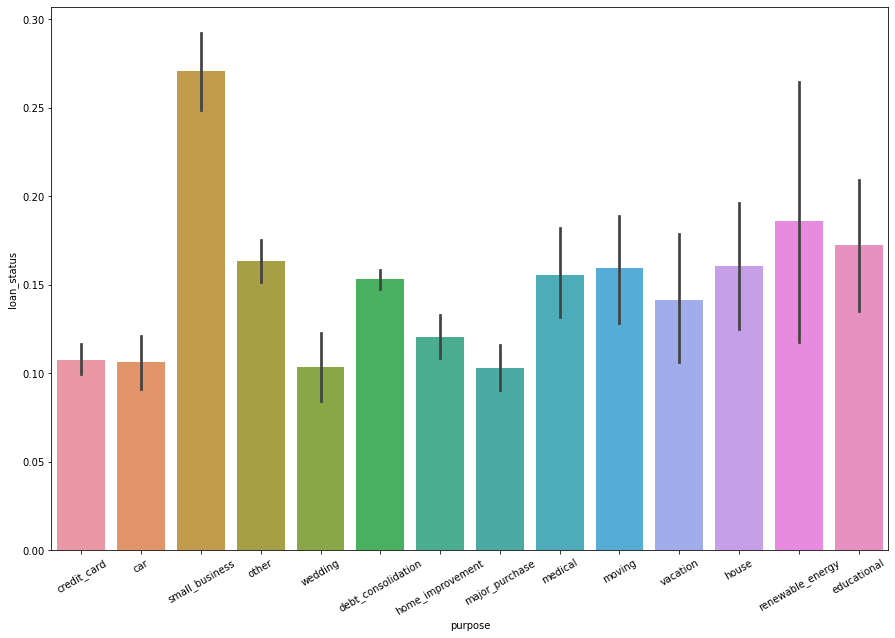

In [32]:
# plotting for loans of different purpose against default rate.
plt.figure(figsize=[15,10])
q=sns.barplot(x='purpose',y='loan_status',data=df)
q.set_xticklabels(q.get_xticklabels(),rotation=30)
plt.show()

**From the above plot it can be infered that the loan application for small_business purpose is most likely to default, follwed by renewable_energy and education.**

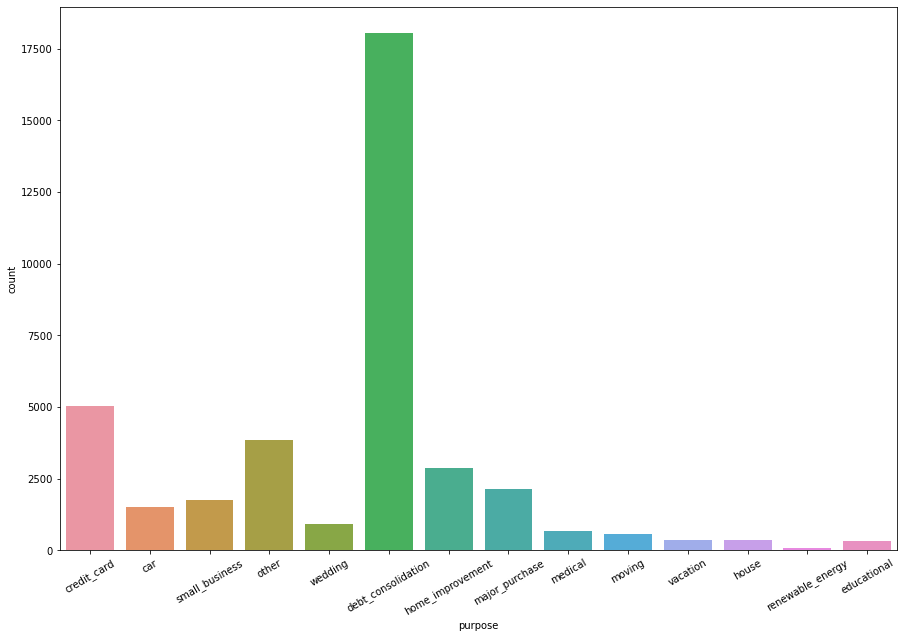

In [33]:
plt.figure(figsize=[15,10])
q=sns.countplot(x='purpose',data=df)
q.set_xticklabels(q.get_xticklabels(),rotation=30)
plt.show()

**From the above plot it can be infered that most of the applicants are applying loan for the purpose of debt_consolidtion followed by credit_card, home_improvement and major_purchase.**


**Hence filtering the data only for these major categories and checking for the defaulties.**

In [34]:
# Dropping all the categories which are irrelavent
df_maxpur=df[(df['purpose']=='credit_card')| (df['purpose']=='debt_consolidation') | 
              (df['purpose']=='home_improvement') | (df['purpose']=='major_purchase')]
df_maxpur.purpose.value_counts()

debt_consolidation    18055
credit_card            5027
home_improvement       2875
major_purchase         2150
Name: purpose, dtype: int64

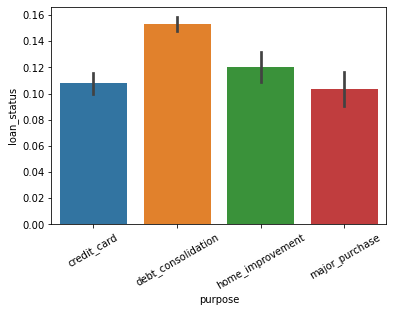

In [35]:
# bar plot for top 4 categories in purpose.
q=sns.barplot(x='purpose',y='loan_status',data=df_maxpur)
q.set_xticklabels(q.get_xticklabels(),rotation=30)
plt.show()

**From the above plot it can be infered that among the top 4 purpose applicants applying for the debt_consolidation are more likely to default followed by home_improment and credit_card.**

In [36]:
#Defining the function to plot categorical variable for 4 major purposes
def plot_catmaxpur(prv):
    sns.barplot(x=prv,y='loan_status',hue='purpose',data=df_maxpur)
    plt.show()

In [37]:
#Defining the function to plot categorical variable
def plot_cat(prv):
    sns.barplot(x=prv,y='loan_status',data=df)
    plt.show()

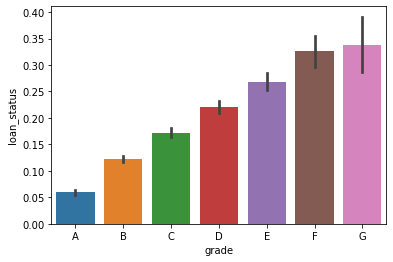

In [38]:
# plotting default rate across grade of loan
plot_cat(df.grade.sort_values())

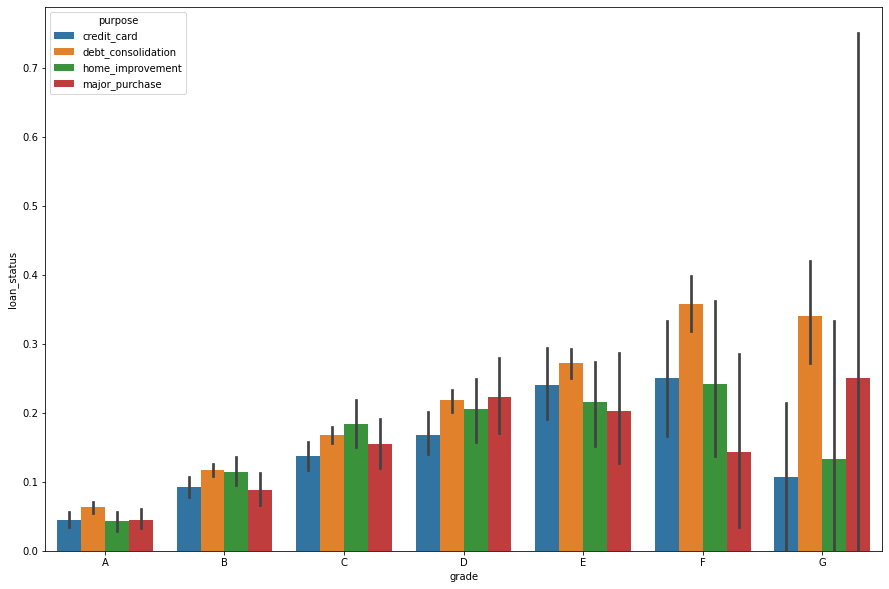

In [39]:
# plotting default rate across grade of loan for 4 major purposes.
plt.figure(figsize=[15,10])
plot_catmaxpur(df.grade.sort_values())

**From the above plot it can be infered that as the aplicant with good grade is not likely too fall in defaults.This is expected because the grade is decided by Lending Club based on the riskiness of the loan. Among all the grade categories the debt_consolidation loans are more likely to defult.**

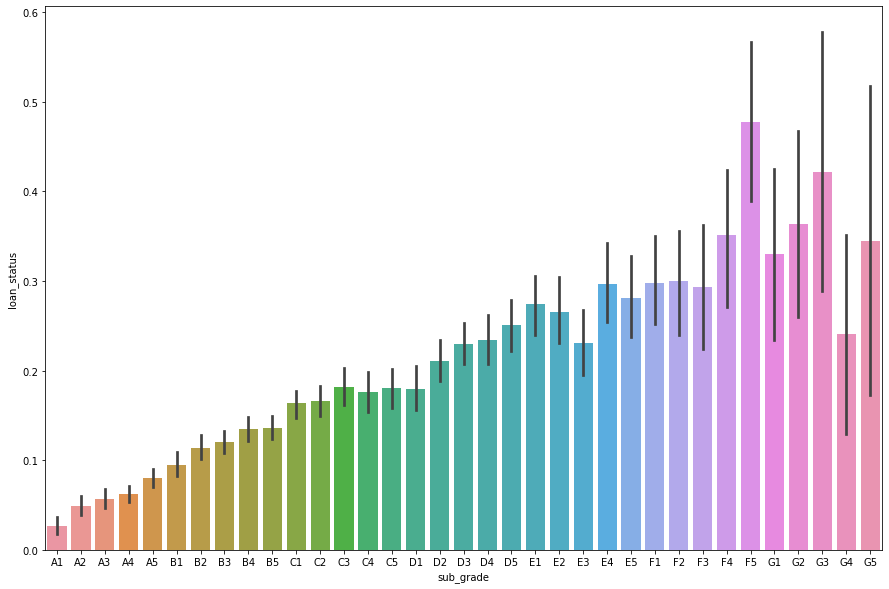

In [40]:
# plotting for the sub grades
plt.figure(figsize=[15,10])
plot_cat(df.sub_grade.sort_values())

**From the above plot it can be inferred that sub-grades also follows the same pattern as grades.**

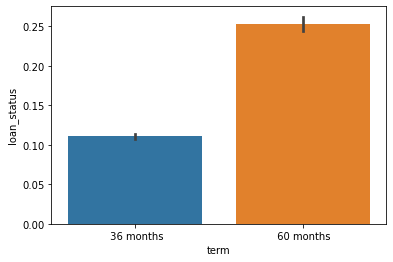

In [41]:
# plotting for term
plot_cat('term')

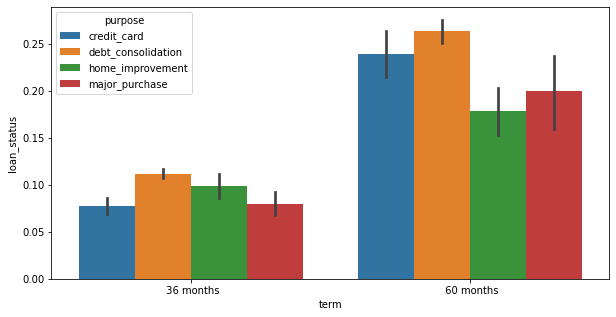

In [42]:
# plotting for term for 4 major purposes
plt.figure(figsize=[10,5])
plot_catmaxpur('term')

**From the above plot it is infered that as the longterm loans are more likely to default.Among all the term categories the debt_consolidation loans are more likely to defult.**

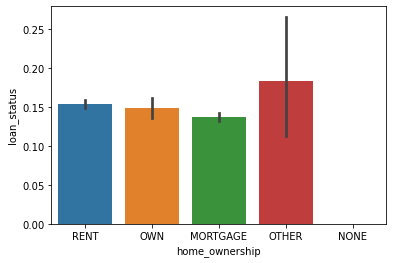

In [43]:
# plotting for home variables
plot_cat('home_ownership')

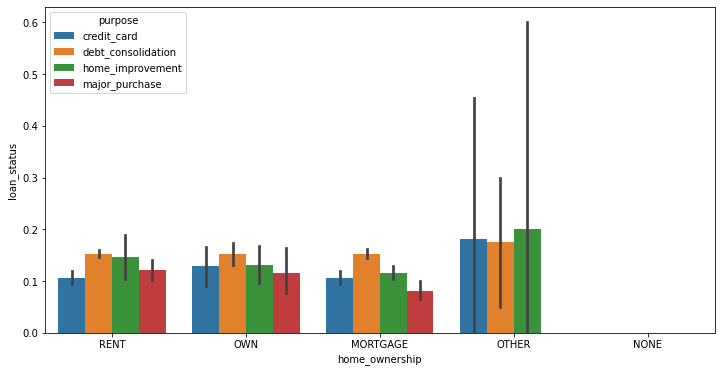

In [44]:
# plotting for term for 4 major purposes
plt.figure(figsize=[12,6])
plot_catmaxpur('home_ownership')

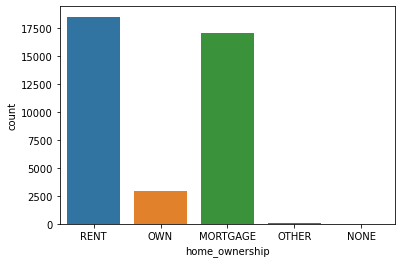

In [45]:
#plotting for frequency of home ownership
sns.countplot(x=df['home_ownership'])
plt.show()

**From the above home ownership plots it can be seen that even tough there are significant difference in number of loan applicants for Rent and Own house, the chances of defaulting the count is same for both the categories.Among most of the home_ownership categories the debt_consolidation loans are more likely to defult.**

**Now we will analyse how the default rate varies across continuous variables.**

In [46]:
df.loan_amnt.describe()

count    38577.000000
mean     11047.025430
std       7348.441646
min        500.000000
25%       5300.000000
50%       9600.000000
75%      15000.000000
max      35000.000000
Name: loan_amnt, dtype: float64

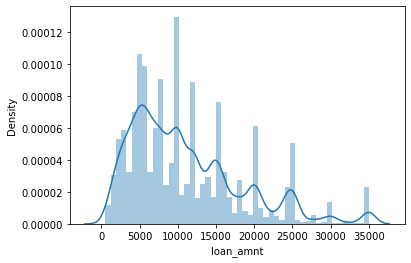

In [47]:
sns.distplot(df['loan_amnt'])
plt.show()

**The easiest way to analyse how default rates vary across continous variables is to bin the variables into discrete categories.**

**Hence binning the loan amount variable into small, medium, high, very high.**

In [48]:
def loan_amount(prv):
    if prv<5000:
        return 'low'
    elif prv >= 5000 and prv < 15000:
        return 'medium'
    elif prv >= 15000 and prv < 25000:
        return 'high'
    else:
        return 'very high'

In [49]:
df['loan_amnt']=df.loan_amnt.apply(lambda x: loan_amount(x))
df.loan_amnt.value_counts()

medium       20675
high          7696
low           7444
very high     2762
Name: loan_amnt, dtype: int64

In [50]:
df_maxpur['loan_amnt']=df_maxpur.loan_amnt.apply(lambda x: loan_amount(x))
df_maxpur['loan_amnt'].value_counts()

medium       15355
high          6376
low           4153
very high     2223
Name: loan_amnt, dtype: int64

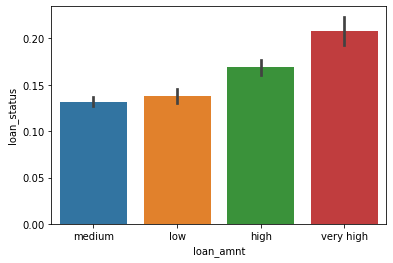

In [51]:
plot_cat('loan_amnt')

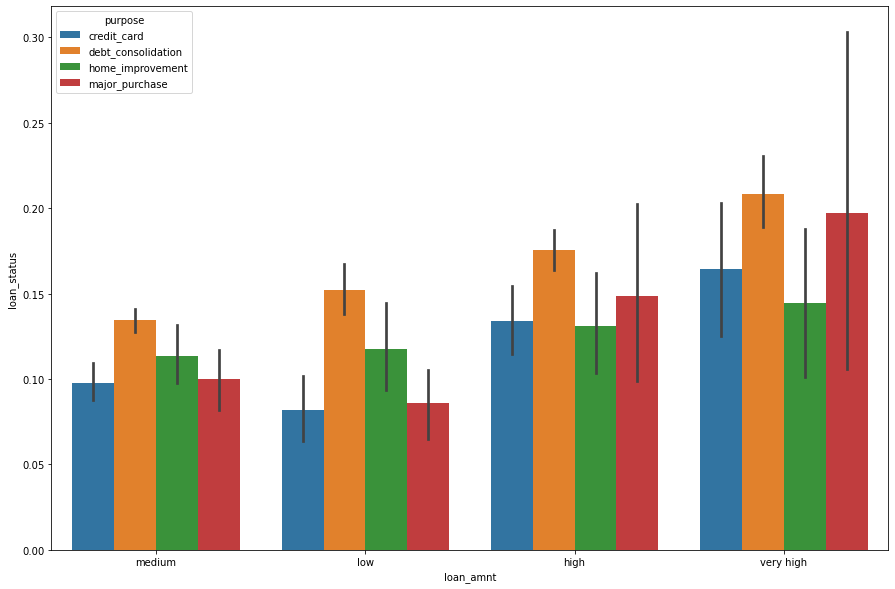

In [52]:
plt.figure(figsize=[15,10])
plot_catmaxpur('loan_amnt')

**From the above plot it can be infer that as the loan amount increaases the applicant is more likely to default.Among all the loan_amnt categories the debt_consolidation loans are more likely to defult.**

In [53]:
df.int_rate.describe()

count    38577.000000
mean        11.932219
std          3.691327
min          5.420000
25%          8.940000
50%         11.710000
75%         14.380000
max         24.400000
Name: int_rate, dtype: float64

In [54]:
# lets also convert interest rate to low, medium, high
# binning int_rate
def int_rat(prv):
    if prv < 8:
        return 'low'
    elif prv >=8 and prv < 13:
        return 'medium'
    else:
        return 'high'

In [55]:
df['int_rate']=df.int_rate.apply(lambda x: int_rat(x))
df.int_rate.value_counts()

medium    15971
high      14579
low        8027
Name: int_rate, dtype: int64

In [56]:
df_maxpur['int_rate']=df_maxpur.int_rate.apply(lambda x: int_rat(x))
df_maxpur['int_rate'].value_counts()

medium    11543
high      10872
low        5692
Name: int_rate, dtype: int64

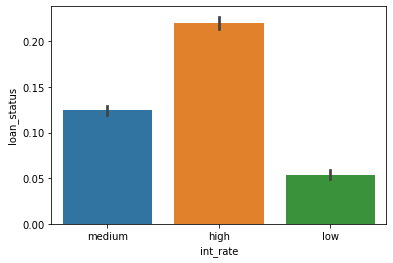

In [57]:
plot_cat('int_rate')

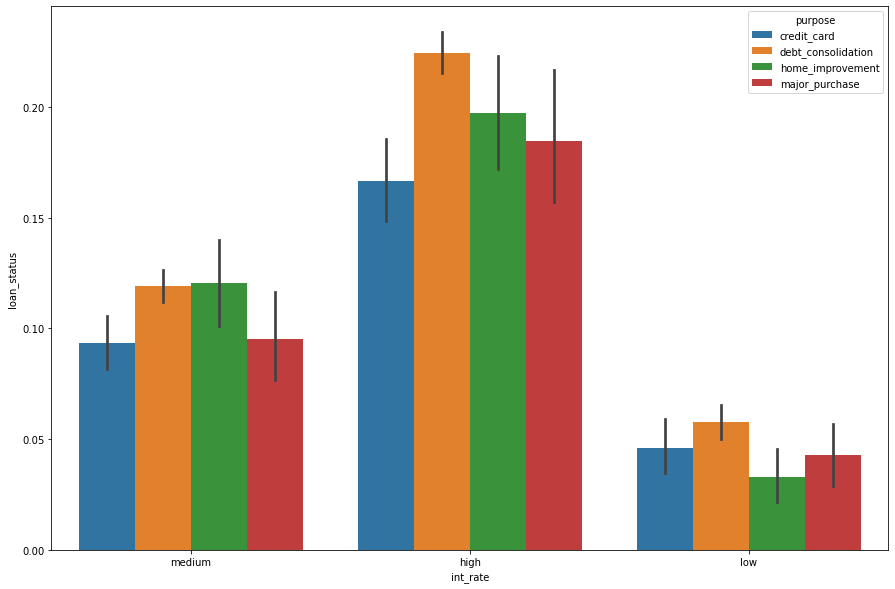

In [58]:
plt.figure(figsize=[15,10])
plot_catmaxpur('int_rate')

**From the above plot it can be infered that higher the rate of interest, higher the default rate.Among most of the int_rate categories the debt_consolidation loans are more likely to defult.**

In [59]:
df.dti.describe()

count    38577.000000
mean        13.272727
std          6.673044
min          0.000000
25%          8.130000
50%         13.370000
75%         18.560000
max         29.990000
Name: dti, dtype: float64

In [60]:
# Binning the debt to income ratio
def dti(prv):
    if prv <= 10:
        return 'low'
    elif prv > 10 and prv <=20:
        return 'medium'
    else:
        return 'high'
    

In [61]:
df['dti'] = df['dti'].apply(lambda x: dti(x))
df['dti'].value_counts()

medium    18441
low       12935
high       7201
Name: dti, dtype: int64

In [62]:
df_maxpur['dti'] = df_maxpur['dti'].apply(lambda x: dti(x))
df_maxpur['dti'].value_counts()

medium    13991
low        8445
high       5671
Name: dti, dtype: int64

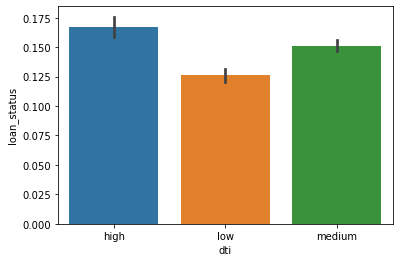

In [63]:
plot_cat('dti')

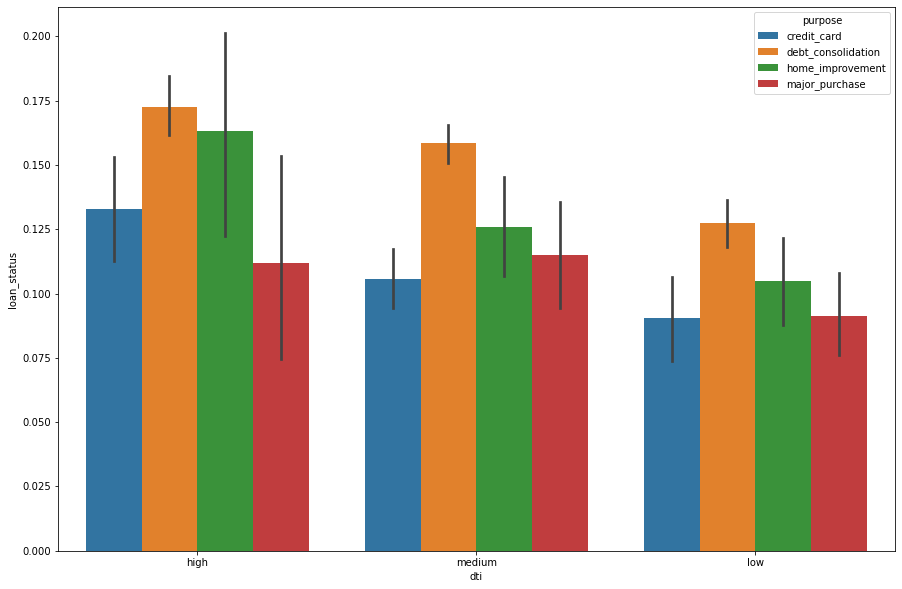

In [64]:
plt.figure(figsize=[15,10])
plot_catmaxpur('dti')

**From the above plot it can be infered that higher the debt to income ratio, higher the default rate.Among all the dti categories the debt_consolidation loans are more likely to defult.**

In [65]:
df.installment.describe()

count    38577.000000
mean       322.466318
std        208.639215
min         15.690000
25%        165.740000
50%        277.860000
75%        425.550000
max       1305.190000
Name: installment, dtype: float64

In [66]:
# binnin for installment
def installment(prv):
    if prv <= 200:
        return 'low'
    elif prv > 200 and prv <=400:
        return 'medium'
    elif prv > 400 and prv <=600:
        return 'high'
    else:
        return 'very high'
    


In [67]:
df['installment'] = df['installment'].apply(lambda x: installment(x))
df['installment'].value_counts()

medium       14732
low          13074
high          6563
very high     4208
Name: installment, dtype: int64

In [68]:
df_maxpur['installment'] = df_maxpur['installment'].apply(lambda x: installment(x))
df_maxpur['installment'].value_counts()

medium       11371
low           7796
high          5467
very high     3473
Name: installment, dtype: int64

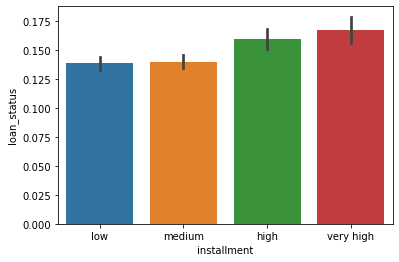

In [69]:
plot_cat('installment')

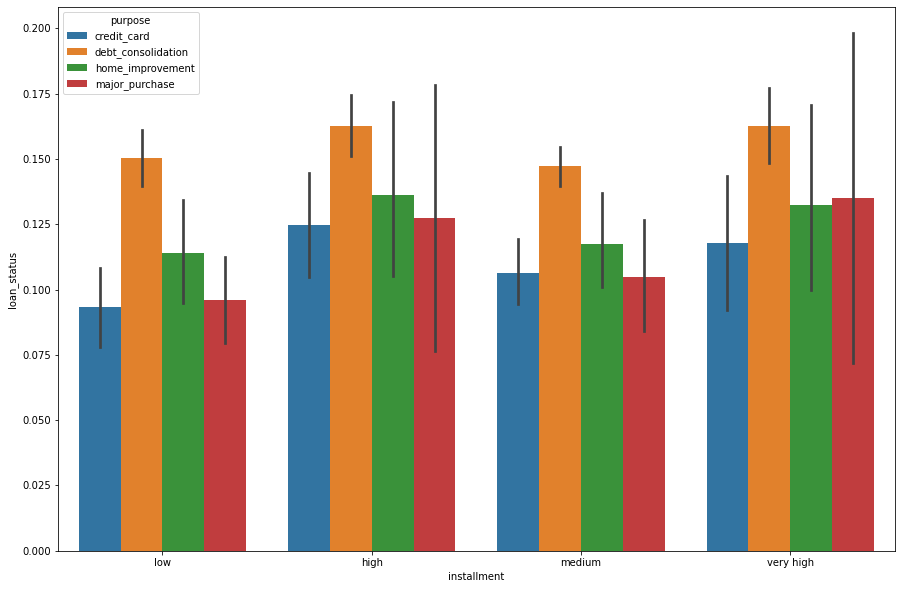

In [70]:
plt.figure(figsize=[15,10])
plot_catmaxpur('installment')

**From the above plot it can be infered that higher the installment amount, higher the default rate.Among all the installment categories the debt_consolidation loans are more likely to defult.**

In [71]:
df.annual_inc.describe()

count    3.857700e+04
mean     6.877797e+04
std      6.421868e+04
min      4.000000e+03
25%      4.000000e+04
50%      5.886800e+04
75%      8.200000e+04
max      6.000000e+06
Name: annual_inc, dtype: float64

In [72]:
# binning for annual income
def annual_income(prv):
    if prv <= 50000:
        return 'low'
    elif prv > 50000 and prv <=100000:
        return 'medium'
    elif prv > 100000 and prv <=150000:
        return 'high'
    else:
        return 'very high'

In [73]:
df['annual_inc'] = df['annual_inc'].apply(lambda x: annual_income(x))
df['annual_inc'].value_counts()

medium       17707
low          15389
high          3995
very high     1486
Name: annual_inc, dtype: int64

In [74]:
df_maxpur['annual_inc'] = df_maxpur['annual_inc'].apply(lambda x: annual_income(x))
df_maxpur['annual_inc'].value_counts()

medium       13241
low          10776
high          2999
very high     1091
Name: annual_inc, dtype: int64

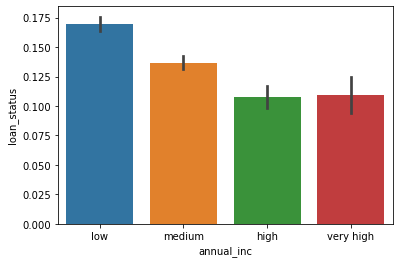

In [75]:
plot_cat('annual_inc')

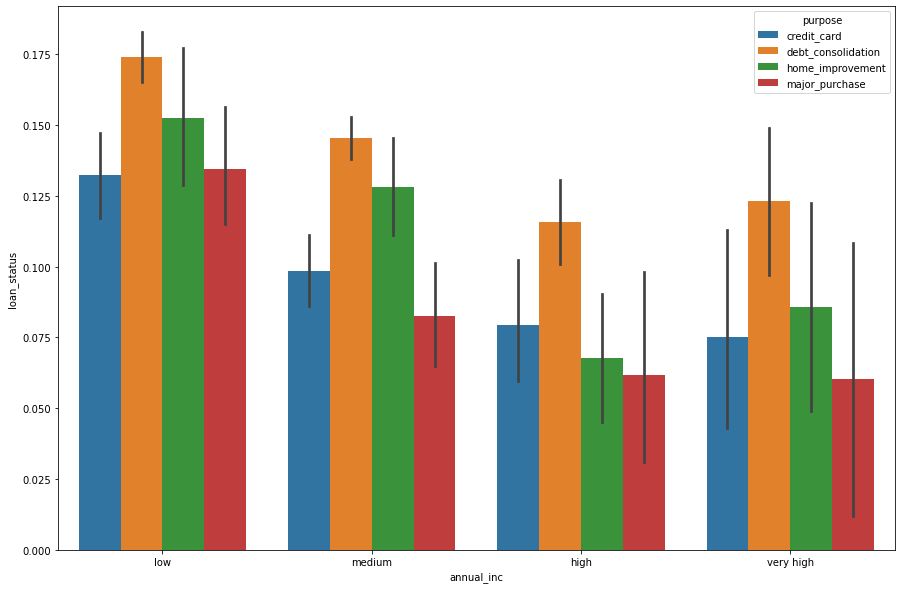

In [76]:
plt.figure(figsize=[15,10])
plot_catmaxpur('annual_inc')

**From the above plot it can be infered that lower the annual income, higher the default rate.Among all the annual income  categories the debt_consolidation loans are more likely to defult.**

## SUMMARY

- Most of the applicants are applying loan for the purpose of debt_consolidtion followed by credit_card, home_improvement and major_purchase.
- Among the top 4 purpose applicants applying for the debt_consolidation are more likely to default followed by home_improment and credit_card.
- The aplicant with good grade is not likely too fall in defaults.This is expected because the grade is decided by Lending Club based on the riskiness of the loan, same pattern is followed by sub_grade category.
- Even tough there are significant difference in number of loan applicants for Rent and Own house, the chances of defaulting the count is same for both the categories.

### The following traits indicate that the applicant is more likely to default:
   - Lower grade                       :[*High impact.*]
   - sub_grade                         :[*Medium impact.*]
   - Higher debt to income ratio       :[*High impact.*]
   - Higher loan amount                :[*Medium impact.*]
   - Long term loans                   :[*High impact.*]
   - Lower the annual income           :[*High impact.*]
   - Higher the number of instalements :[*Medium impact.*]
   - Higher rate of interest           :[*High impact.*]